In [4]:
import pandas as pd

##### 1) Read the datset

In [5]:
df=pd.read_csv("Churn_Modelling.csv")
# 0 means not exit and 1 means exit

In [6]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [7]:
df.shape

(10000, 14)

#### 2) Distinguish the feature and target set and divide the data set into training and test sets.

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
X=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']]
Y=df['Exited']

In [10]:
Y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

#### 3) Normalize the train and test data. 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [18]:
X_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

#### 4) Initialize and build the model. Identify the points of improvement and implement the same. 

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=0)

In [20]:
from sklearn.neural_network import MLPClassifier
nn_model=MLPClassifier(hidden_layer_sizes=(80,80,80),random_state=0,max_iter=100,activation='relu')

In [21]:
# MLPClassifier stands for Multilayer Perceptron Classifier. It is a type of neural network that consists of multiple layers of nodes (neurons)
# The tuple (80, 80, 80) indicates that the neural network will have three hidden layers, each containing 80 neurons.
# max_iter sets the maximum number of iterations (epochs) the optimizer will perform during training.
# activation specifies the activation function to use for the hidden layers.'relu': Rectified Linear Unit, outputs the input directly if positive; otherwise, it outputs zero.

In [22]:
nn_model.fit(X_train,Y_train)

C:\Users\Ashvini Mahajan\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(80, 80, 80), max_iter=100, random_state=0)

In [23]:
y_pred=nn_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score

In [25]:
Y_test.value_counts()

Exited
0    1991
1     509
Name: count, dtype: int64

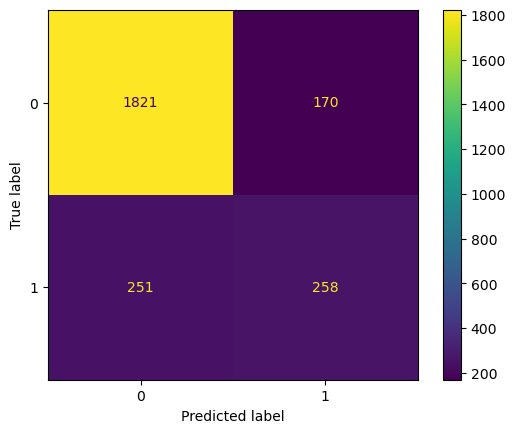

In [26]:
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)

In [27]:
accuracy_score(Y_test,y_pred)

0.8316

In [28]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1991
           1       0.60      0.51      0.55       509

    accuracy                           0.83      2500
   macro avg       0.74      0.71      0.72      2500
weighted avg       0.82      0.83      0.83      2500



In [29]:
# the recall value for 0 (not exit) is 0.81 whereas recall value for 1 (exit) is 0.24, so there is huge gap between them,
# the gap should be as less as possible.
# this happens because of imbalance dataset, we can see that entries for 0 are very more compared to 1
# So, we need to balance the dataset

In [30]:
Y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [31]:
# here we need to increase entries of 1

In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_new,Y_new=ros.fit_resample(X,Y)

In [15]:
Y_new.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [16]:
# now dataset is balanced
# now again make the model

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_new)

In [33]:
Xn_train,Xn_test,Yn_train,Yn_test =train_test_split(X_scaled,Y_new,random_state=0,test_size=0.25)

In [34]:
from sklearn.neural_network import MLPClassifier
nn_model=MLPClassifier(hidden_layer_sizes=(80,80,80),random_state=0,max_iter=100,activation='relu')
nn_model.fit(Xn_train,Yn_train)

C:\Users\Ashvini Mahajan\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(80, 80, 80), max_iter=100, random_state=0)

In [35]:
y_pred=nn_model.predict(Xn_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [37]:
Yn_test.value_counts()

Exited
1    2001
0    1981
Name: count, dtype: int64

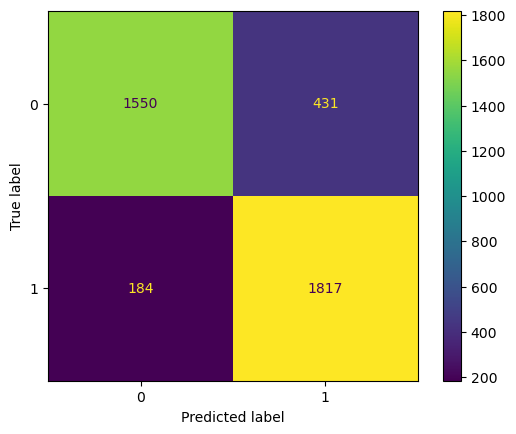

In [38]:
ConfusionMatrixDisplay.from_predictions(Yn_test,y_pred)

In [40]:
accuracy_score(Yn_test,y_pred)

0.8455549974886991

In [42]:
print(classification_report(Yn_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1981
           1       0.81      0.91      0.86      2001

    accuracy                           0.85      3982
   macro avg       0.85      0.85      0.84      3982
weighted avg       0.85      0.85      0.84      3982

